# Example program of type-1 fuzzy system:
## Determing expected customers in an ice cream shop given a particular outside temperature

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
x,y,z = [int(x) for x in input("Enter the range of temp.:").split(' ')]
temp = np.arange(x, y, z)

In [4]:
x,y = [int(x) for x in input("Enter the range of number of customers:").split(' ')]
customers = np.arange(x, y, 1)

Enter the range of number of customers:0 100


In [5]:
temp_list = input("Enter the types of temp descriptions:").split(' ')
print(temp_list)

t_ = []

print("\n1:triangular membership func\n2:trapaziod membership function")

for i in range(len(temp_list)):
    m = int(input(f"\nEnter the no. corresponding to the type of membership function given in above menu for {temp_list[i]} temp : "))
    print(f"Enter the numbers for {temp_list[i]} temp:")
    tempType = [int(x) for x in input().split(' ')]
    if m == 1:
        t_.append(fuzz.trimf(temp, tempType))
    elif m == 2:
        t_append(fuzz.trapmf(temp, tempType))


Enter the types of temp descriptions:cold warm hot
['cold', 'warm', 'hot']

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function given in above menu for cold temp : 1
Enter the numbers for cold temp:
0 0 20

Enter the no. corresponding to the type of membership function given in above menu for warm temp : 1
Enter the numbers for warm temp:
10 20 30

Enter the no. corresponding to the type of membership function given in above menu for hot temp : 1
Enter the numbers for hot temp:
20 50 50


In [6]:
customer_list = input("Enter the types of crowdedness in the parlor:").split(' ')
print(customer_list)

c_ = []

print("\n1:triangular membership func\n2:trapaziod membership function")

for i in range(len(customer_list)):
    m = int(input(f"\nEnter the no. corresponding to the type of membership function given in above menu for {customer_list[i]} ice cream parlor: "))
    print(f"Enter the numbers for {customer_list[i]} ice cream parlor:")
    customerType = [int(x) for x in input().split(' ')]
    if m == 1:
        c_.append(fuzz.trimf(customers, customerType))
    elif m == 2:
        c_append(fuzz.trapmf(customers, customerType))


Enter the types of crowdedness in the parlor:little medium high
['little', 'medium', 'high']

1:triangular membership func
2:trapaziod membership function

Enter the no. corresponding to the type of membership function given in above menu for little ice cream parlor: 1
Enter the numbers for little ice cream parlor:
0 0 50

Enter the no. corresponding to the type of membership function given in above menu for medium ice cream parlor: 1
Enter the numbers for medium ice cream parlor:
25 50 75

Enter the no. corresponding to the type of membership function given in above menu for high ice cream parlor: 1
Enter the numbers for high ice cream parlor:
50 100 100


The following plot shows the temp range


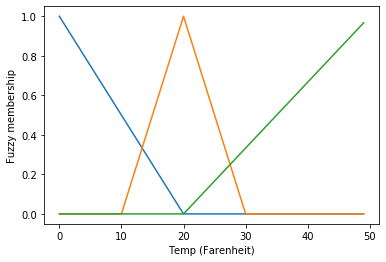

In [7]:
print('The following plot shows the temp range')
fig, ax = plt.subplots()
for i in range(len(t_)):
    ax.plot(temp, t_[i])
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Temp (Farenheit)')
ax.set_ylim(-0.05, 1.05)
ax.plot();


The following plot shows the temp range


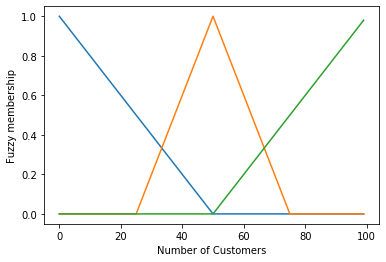

In [8]:
print('The following plot shows the temp range')
fig, ax = plt.subplots()
for i in range(len(c_)):
    ax.plot(customers, c_[i])
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Number of Customers')
ax.set_ylim(-0.05, 1.05)
ax.plot();

In [9]:
reln = []
print("List of attributes in Temp: ")
for i in range(len(temp_list)):
    print(f"{i+1}:{temp_list[i]}")

print("\nList of attributes in Customer Crowdedness: ")
for i in range(len(customer_list)):
    print(f"{i+1}:{customer_list[i]}")
    
n = int(input('\nEnter the number of implications to be made:'))
for i in range(n):
    tempT, custT = [int(x) for x in input('\nEnter the number corresponding to the type of temp and crowdedness based on above menu to make the implication bw them:').split(' ')]
#     print(t_[tempT-1], c_[custT-1])
    r = fuzz.relation_product(t_[tempT-1], c_[custT-1])
    reln.append(r)


List of attributes in Temp: 
1:cold
2:warm
3:hot

List of attributes in Customer Crowdedness: 
1:little
2:medium
3:high

Enter the number of implications to be made:3

Enter the number corresponding to the type of temp and crowdedness based on above menu to make the implication bw them:1 1

Enter the number corresponding to the type of temp and crowdedness based on above menu to make the implication bw them:2 2

Enter the number corresponding to the type of temp and crowdedness based on above menu to make the implication bw them:3 3


In [10]:
l = len(reln)-1
npfmax = np.fmax(reln[l-1], reln[l])
for i in range(len(reln)-2):
    l = (len(reln)- 1) - (i + 1)
    npfmax = np.fmax(reln[l-1], npfmax)
    
R_combined = npfmax

In [11]:
predicted_customers = np.zeros_like(temp)
# the type of zero_like array remains same as temp
for i in range(len(predicted_customers)):
    predicted_customers[i] = fuzz.defuzz(customers, R_combined[i, :], 'centroid')

In [ ]:
for i in range(5):
    t = int(input("\nNow enter the temp at which no. of customer is to be predicted:"))
    print(f'The no. of customer in ice cream parlor at outer temp:{t} = {predicted_customers[temp == t]}')
    plt.plot(temp, predicted_customers, 'g')
    plt.vlines(t, 5, predicted_customers[temp == t], color='DarkOrange', linestyle='dashed', lw=2)
    plt.hlines(predicted_customers[temp == t], 30, t, color='DarkOrange', linestyle='dashed', lw=2)
    plt.xlabel('Temperature')
    plt.ylabel('Customers')
    plt.plot()


Now enter the temp at which no. of customer is to be predicted:50
The no. of customer in ice cream parlor at outer temp:50 = []

Now enter the temp at which no. of customer is to be predicted:49
The no. of customer in ice cream parlor at outer temp:49 = [82]
